<a href="https://colab.research.google.com/github/JithmaKaluarachchi/DL-Lab-Answers/blob/main/LAB1_IT22095176_Answers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lab Sheet 1**

**Task 1**

In [ ]:
# 1.
import numpy as np

np.random.seed(0)
arr_4x4 = np.random.exponential(scale=1.0, size=(4,4))
print(arr_4x4)


[[0.79587451 1.25593076 0.92322315 0.78720115]
 [0.55104849 1.03815929 0.5755192  2.22352441]
 [3.31491218 0.4836021  1.56889614 0.75267411]
 [0.83943285 2.59825415 0.07368535 0.09116103]]


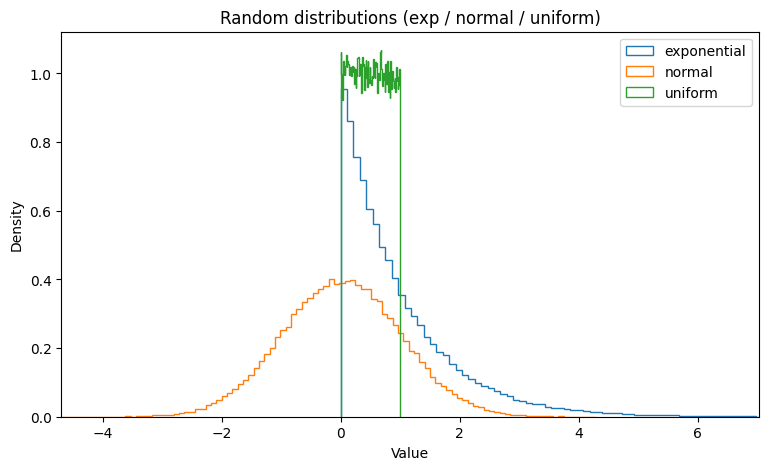

In [ ]:
# 2.
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
n = 100000
exp = np.random.exponential(scale=1.0, size=n)
norm = np.random.normal(loc=0, scale=1, size=n)
uni = np.random.rand(n)

plt.figure(figsize=(9,5))
plt.hist(exp, bins=100, density=True, histtype="step", label="exponential")
plt.hist(norm, bins=100, density=True, histtype="step", label="normal")
plt.hist(uni, bins=100, density=True, histtype="step", label="uniform")
plt.legend(loc="upper right")
plt.title("Random distributions (exp / normal / uniform)")
plt.xlabel("Value")
plt.ylabel("Density")

# adjust view for readability: exponential is positive, so show percentile-based xlim:
plt.xlim( np.min([exp.min(), norm.min(), uni.min()]), np.percentile(exp,99.9) )
plt.ylim(0, None)
plt.show()


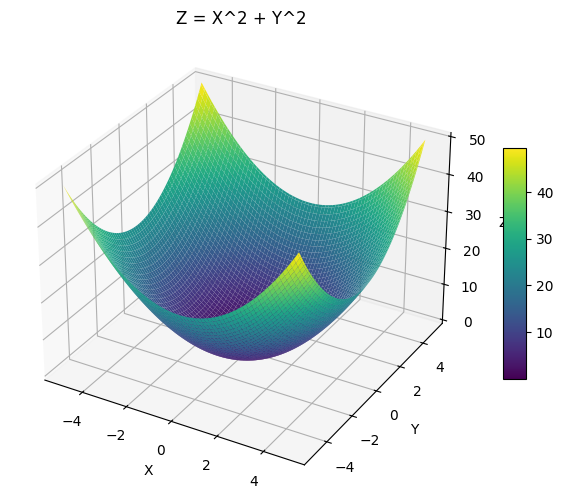

In [ ]:
# 3.
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D   # registers the 3D projection

x = np.linspace(-5, 5, 200)
y = np.linspace(-5, 5, 200)
X, Y = np.meshgrid(x, y)
Z = X**2 + Y**2

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, Z, rstride=3, cstride=3, cmap='viridis', edgecolor='none')
ax.set_xlabel('X'); ax.set_ylabel('Y'); ax.set_zlabel('Z')
ax.set_title('Z = X^2 + Y^2')
fig.colorbar(surf, shrink=0.5, aspect=10)
plt.show()


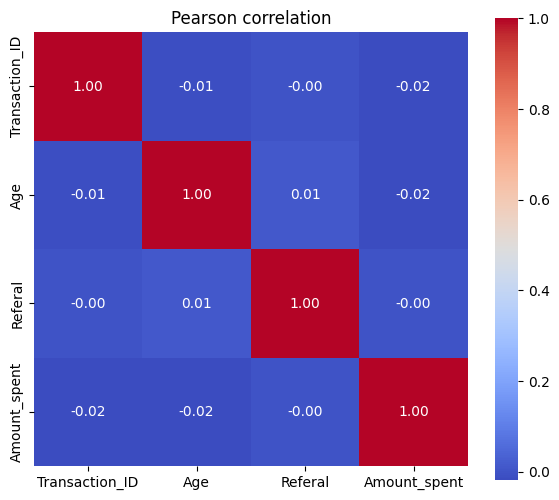

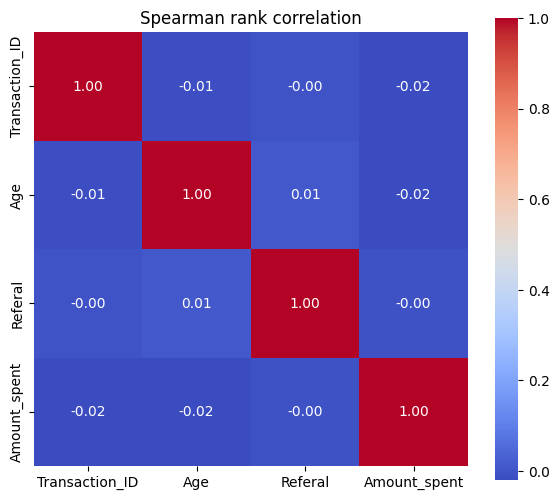

In [ ]:
# 4.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('online_store_customer_data.csv')

cols = ['Transaction_date', 'Transaction_ID', 'Gender', 'Age', 'Marital_status', 'State_names', 'Segment', 'Employees_status', 'Payment_method', 'Referal', 'Amount_spent']

sub = df[cols].dropna()

# Convert date column if needed (not used for correlation)
sub['Transaction_date'] = pd.to_datetime(sub['Transaction_date'])

# Select only numeric columns for correlation
numeric_sub = sub.select_dtypes(include=['number'])

pearson = numeric_sub.corr(method='pearson')
spearman = numeric_sub.corr(method='spearman')

plt.figure(figsize=(7,6))
sns.heatmap(pearson, annot=True, fmt='.2f', square=True, cmap='coolwarm')
plt.title('Pearson correlation')
plt.show()

plt.figure(figsize=(7,6))
sns.heatmap(spearman, annot=True, fmt='.2f', square=True, cmap='coolwarm')
plt.title('Spearman rank correlation')
plt.show()


**Task 2**

In [ ]:
import pandas as pd
df = pd.read_csv('Au_nanoparticle_dataset.csv')

In [ ]:
# 1.
new_df = df[['N_total', 'N_bulk', 'N_surface', 'R_avg']].copy()

In [ ]:
# 2.
new_df.head(20)

,N_total,N_bulk,N_surface,R_avg
0,1599,1014,585,17.3706
1,1642,1034,608,17.6061
2,4637,3365,1272,25.3692
3,7189,5292,1897,29.7011
4,11004,8508,2496,34.2831
5,13375,10768,2607,36.6334
6,13795,11155,2640,37.0108
7,13947,11304,2643,37.1672
8,14020,11357,2663,37.2103
9,14056,11389,2667,37.2467


In [ ]:
# 3.
# summary stats (mean, std, min, 25%, 50%, 75%, max)
new_df.describe()

# explicit quartiles:
new_df.quantile([0.25, 0.5, 0.75])


,N_total,N_bulk,N_surface,R_avg
0.25,1061.0,618.75,437.00,15.160725
0.50,1867.0,1199.00,666.00,18.629250
0.75,4503.0,3183.00,1301.75,25.525125


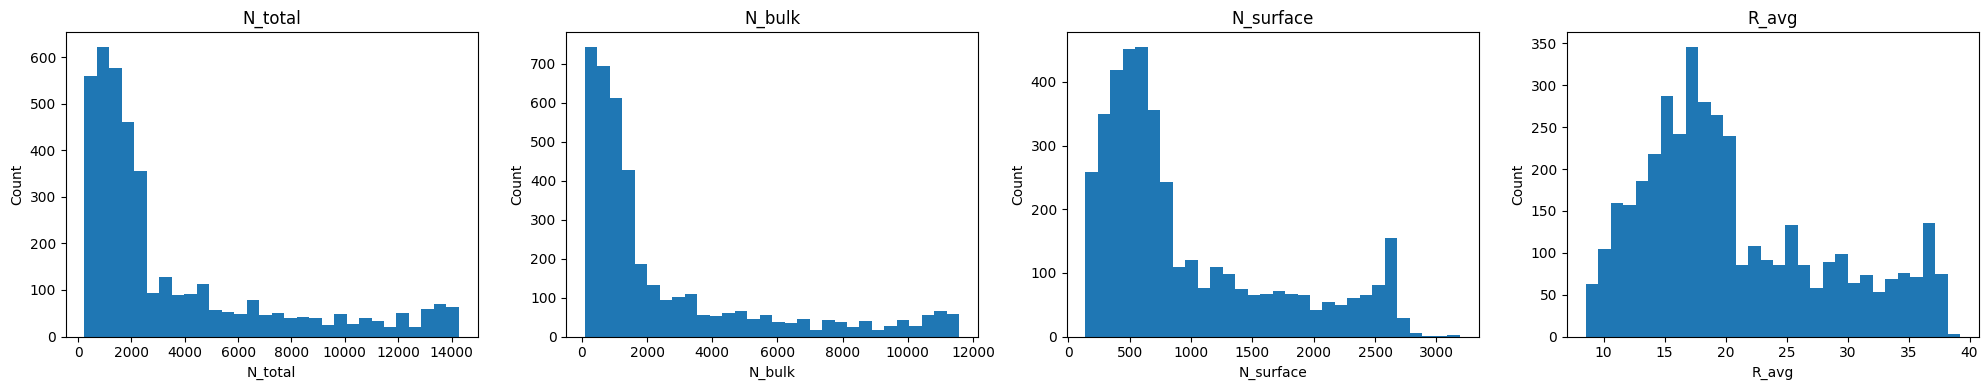

In [ ]:
# 4.
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 4, figsize=(20,4))
for ax, col in zip(axes, new_df.columns):
    ax.hist(new_df[col].dropna(), bins=30)
    ax.set_title(col)
    ax.set_xlabel(col)
    ax.set_ylabel('Count')
plt.tight_layout()
plt.show()


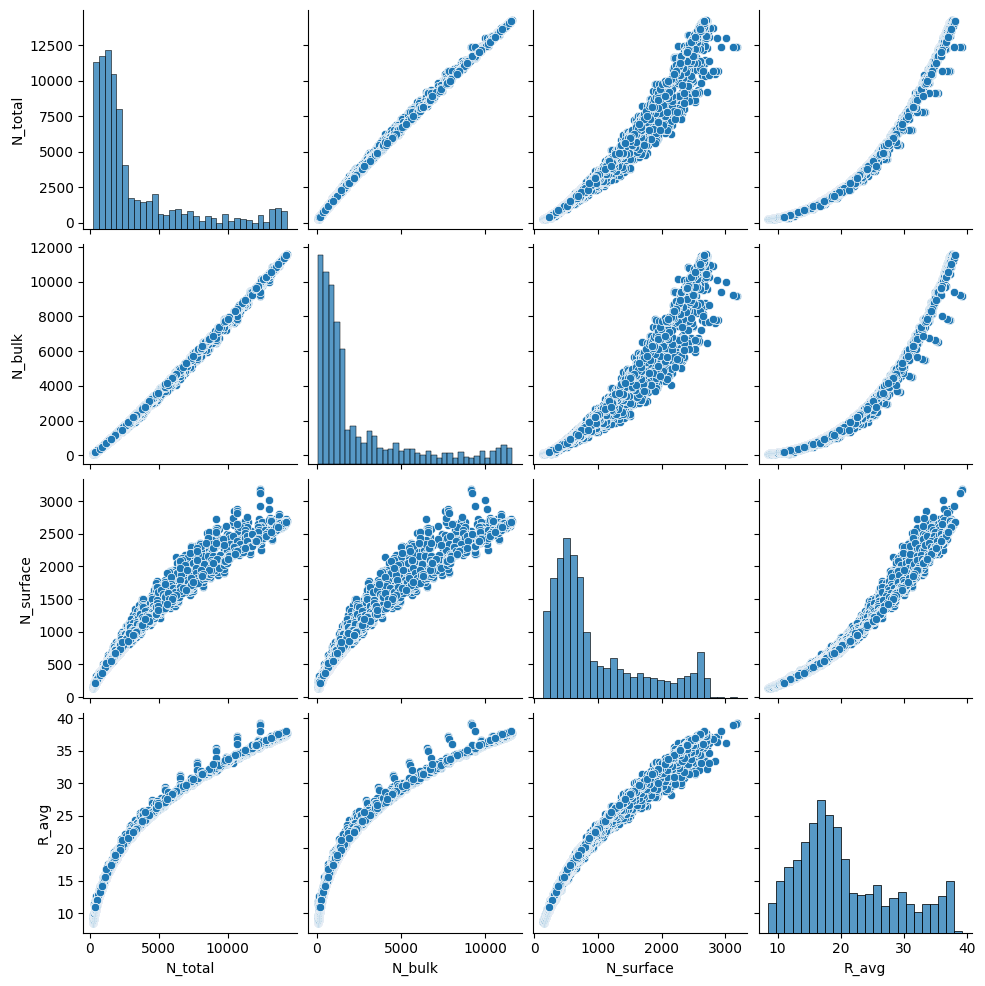

In [ ]:
# 5.
import seaborn as sns
sns.pairplot(new_df.dropna(), diag_kind='hist')   # simple quick view
plt.show()

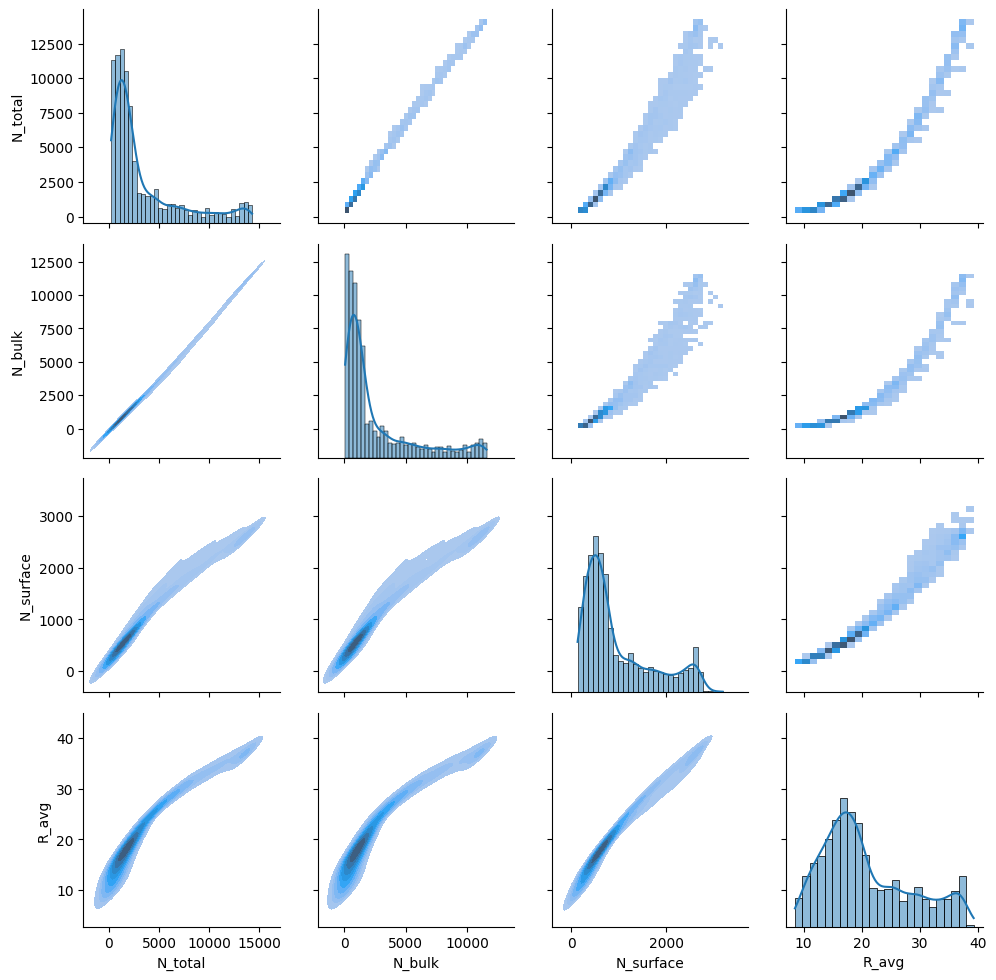

In [ ]:
# 6
g = sns.PairGrid(new_df.dropna())
g.map_upper(sns.histplot)                 # bivariate hist on upper
g.map_diag(sns.histplot, kde=True)        # diag: hist + kde (if seaborn supports kde in histplot)
g.map_lower(sns.kdeplot, fill=True)       # lower: bivariate KDE
plt.show()

